In [38]:
import pandas as pd
import sys
sys.path.append('../')
from config import plt

In [23]:
source_filepath = '../datasets/prog_langs.csv'
target_filepath = '../plots'

In [10]:
prog_langs_df = pd.read_csv(source_filepath)
prog_langs_df.head()

,Responder_id,LanguagesWorkedWith
0,1,HTML/CSS;Java;JavaScript;Python
1,2,C++;HTML/CSS;Python
2,3,HTML/CSS
3,4,C;C++;C#;Python;SQL
4,5,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA


In [11]:
get_row = lambda csv_val: pd.Series(1, index=csv_val.split(';'))
prog_lang_freq = prog_langs_df['LanguagesWorkedWith'].apply(get_row).sum().sort_values(ascending=True)

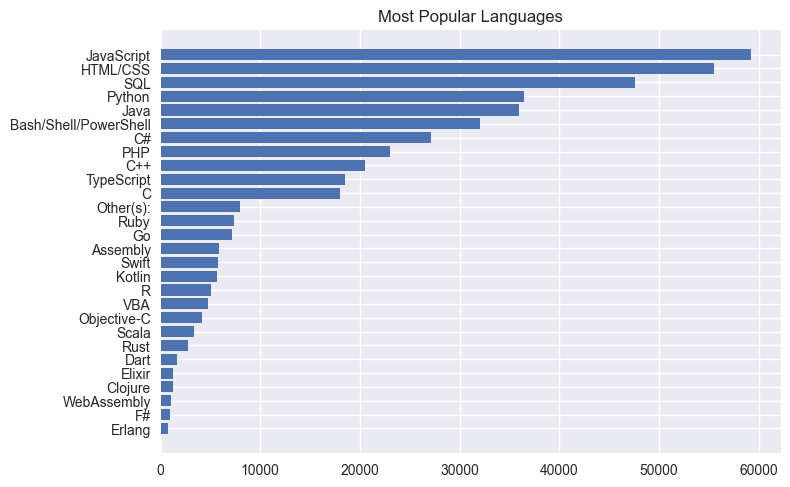

In [12]:
plt.barh(prog_lang_freq.index, prog_lang_freq.values)
plt.title("Most Popular Languages")
# plt.ylabel('Programming Language')
plt.savefig(f'{target_filepath}/prog_langs_barh.png')
plt.show()

In [13]:
import collections

data = pd.read_csv(source_filepath)
ids = data['Responder_id']
lang_responses = data['LanguagesWorkedWith']

language_counter = collections.Counter()

update_language_counter = lambda reponse: language_counter.update(reponse.split(';'))
data['LanguagesWorkedWith'].apply(update_language_counter)

for response in lang_responses:
    language_counter.update(response.split(';'))

languages = []
popularity = []

for item in language_counter.most_common():
    languages.append(item[0])
    popularity.append(item[1])

languages.reverse()
popularity.reverse()


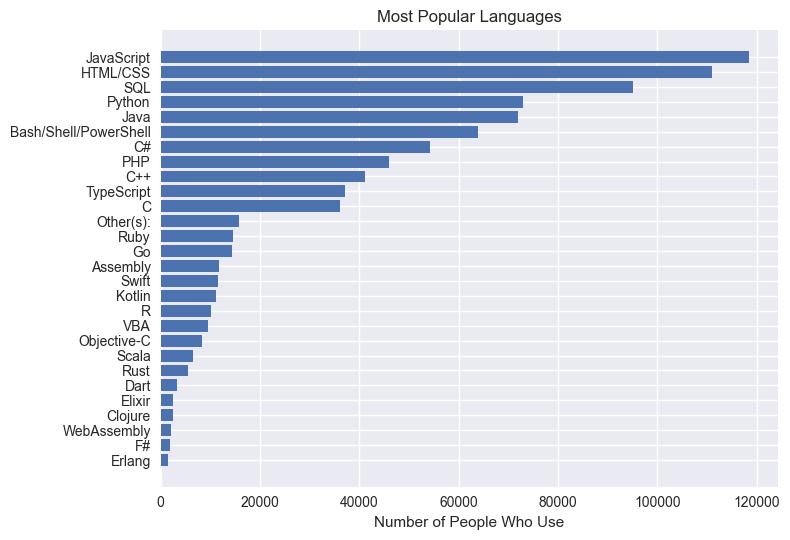

In [14]:
plt.barh(languages, popularity)

plt.title("Most Popular Languages")
# plt.ylabel("Programming Languages")
plt.xlabel("Number of People Who Use")

plt.tight_layout()

plt.show()